In [1]:
import numpy as np
import os
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [17]:
import time

In [26]:
time.time()

1512902537.8226862

In [27]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=np.int32(time.time()))#DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [28]:
from matplotlib.colors import ListedColormap
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    set_trace()
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [29]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

> <ipython-input-28-36a76381800a>(9)plot_decision_boundary()
      7     set_trace()
      8 
----> 9     x1s = np.linspace(axes[0], axes[1], 100)
     10     x2s = np.linspace(axes[2], axes[3], 100)
     11     x1, x2 = np.meshgrid(x1s, x2s)

ipdb> c


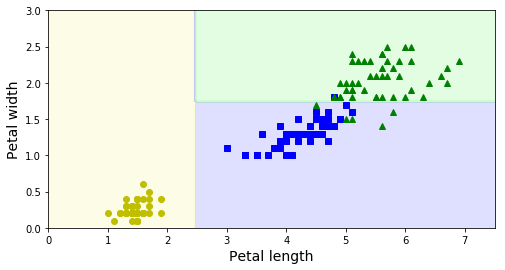

In [30]:
plt.show()

In [31]:
tree_clf.predict_proba([[1.5,2]])

array([[ 1.,  0.,  0.]])

In [ ]:
Regression